# Dummy datasets exploration

Here I'm exploring the dummy datasets given by Vishruth from Gemeente Amsterdam

In [214]:
import numpy as np
import pandas as pd

import geopandas
import matplotlib.pyplot as plt
import folium
import seaborn as sns
sns.set_theme(style="darkgrid")

p_resono = '/home/serzhilin/Documents/Postdoc/datasets/dummy/resono/'


Snippet for scaling up plots

In [215]:
def scale_plot_size(factor=2):
    import matplotlib as mpl
    default_dpi = mpl.rcParamsDefault['figure.dpi']
    mpl.rcParams['figure.dpi'] = default_dpi*factor

In [216]:
scale_plot_size()

## GGD

In [217]:
p_ggd = '/home/serzhilin/Documents/Postdoc/datasets/dummy/ggd/dummydata_coronit_patient_for_sharing.csv'
ggd = pd.read_csv(p_ggd)

In [218]:
ggd

,YearWkNr_appointment_made,PC4,age_groups_2021,gender,unique_patient_count_shuffle_replace
0,202021,1024,36-40,VROUW,16
1,202021,1025,<5,MAN,19
2,202021,1053,<5,VROUW,12
3,202021,1062,31-35,VROUW,22
4,202021,1079,56-60,MAN,26
...,...,...,...,...,...
234960,202213,1433,51-55,VROUW,11
234961,202213,1433,61-65,MAN,1
234962,202213,1433,61-65,VROUW,6
234963,202213,1433,71-75,MAN,4


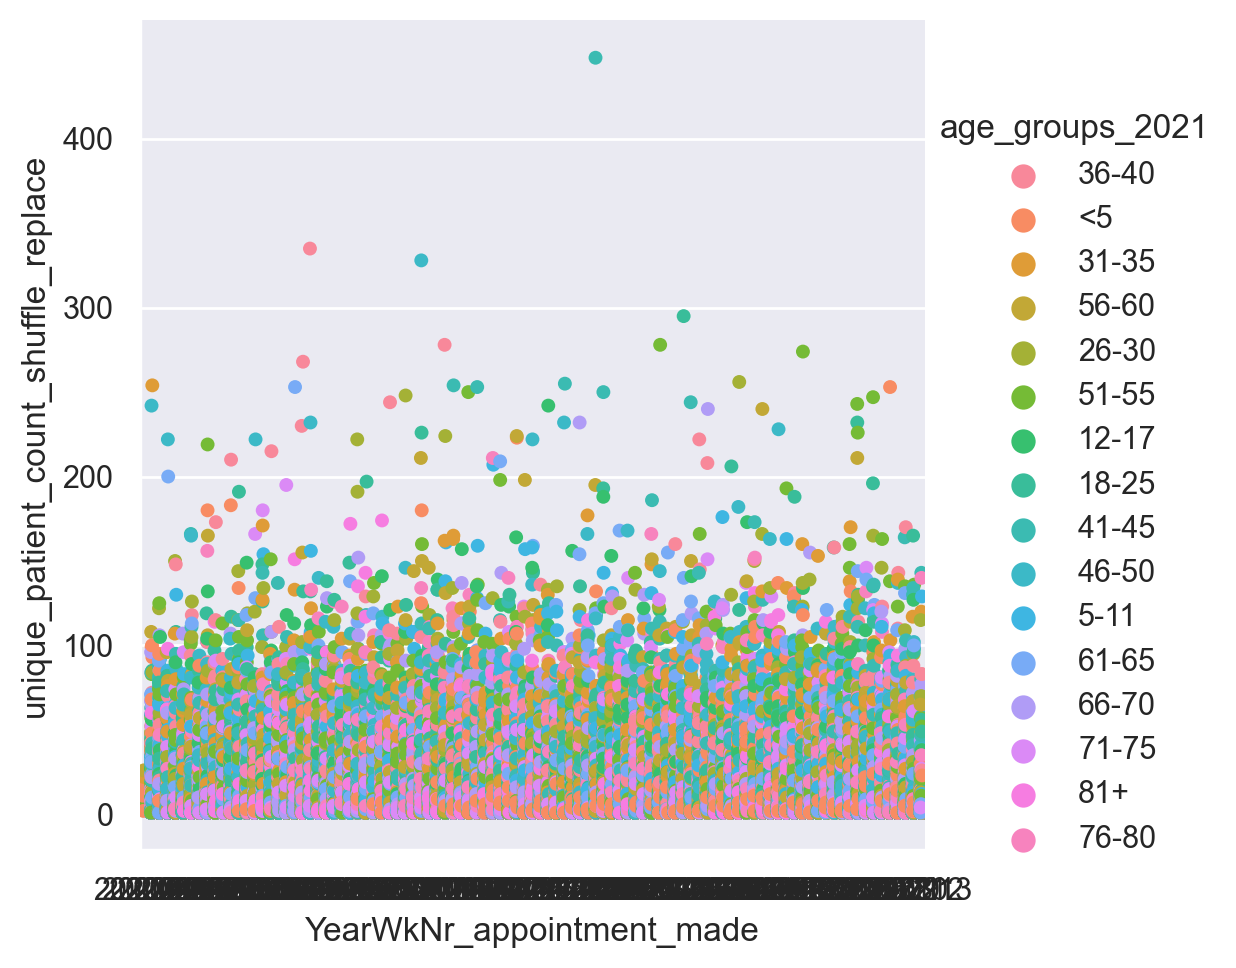

In [213]:
scale_plot_size()
sns.catplot(y = 'unique_patient_count_shuffle_replace', x = 'YearWkNr_appointment_made', hue = 'age_groups_2021', data = ggd)
plt.show()

## Resono 

### Visitors by hour

In [43]:
p_resono_hourly = 'resono_hourly_visits_130322_190322.csv'
resono_hourly = pd.read_csv(p_resono + p_resono_hourly)

In [81]:
resono_hourly.head()

,Unnamed: 0,Location,Locationcode,Resono-ID,Date,Hour,Visits,Unique,Recurring,Visits_norm,Unique_norm,Recurring_norm
0,0,Overhoeksparklaan,01c00230-bcb5-4d86-bf79-2a53ed1b1415,rcd23021,2022-03-13,0,526,245,63,268.0,201.0,111.0
1,1,Overhoeksparklaan,01c00230-bcb5-4d86-bf79-2a53ed1b1415,rcd23021,2022-03-13,1,724,301,131,368.0,247.0,230.0
2,2,Overhoeksparklaan,01c00230-bcb5-4d86-bf79-2a53ed1b1415,rcd23021,2022-03-13,2,801,326,100,407.0,267.0,176.0
3,3,Overhoeksparklaan,01c00230-bcb5-4d86-bf79-2a53ed1b1415,rcd23021,2022-03-13,3,601,230,88,306.0,189.0,155.0
4,4,Overhoeksparklaan,01c00230-bcb5-4d86-bf79-2a53ed1b1415,rcd23021,2022-03-13,4,344,164,85,175.0,134.0,149.0


In [69]:
resono_hourly.describe()

,Unnamed: 0,Hour,Visits,Unique,Recurring,Visits_norm,Unique_norm,Recurring_norm
count,15456.000000,15456.00000,15456.000000,15456.000000,15456.000000,15456.000000,15456.000000,15456.000000
mean,7727.500000,11.50000,1293.411038,843.459951,544.107660,657.819876,691.473408,955.922619
std,4461.907216,6.92241,1614.137834,1065.273285,685.660321,820.942681,873.318163,1204.600859
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3863.750000,5.75000,234.000000,157.000000,94.000000,119.000000,129.000000,165.000000
50%,7727.500000,11.50000,713.000000,451.000000,285.000000,363.000000,370.000000,501.000000
75%,11591.250000,17.25000,1731.250000,1130.000000,735.000000,880.250000,926.000000,1291.000000
max,15455.000000,23.00000,19662.000000,12198.000000,5692.000000,10000.000000,10000.000000,10000.000000


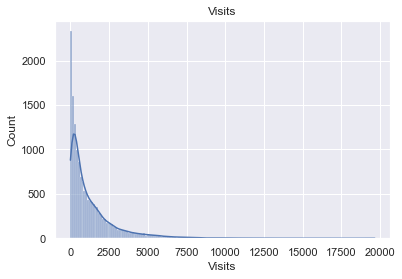

In [71]:
sns.histplot(resono_hourly.Visits, kde = False).set_title('Visits')
plt.show()

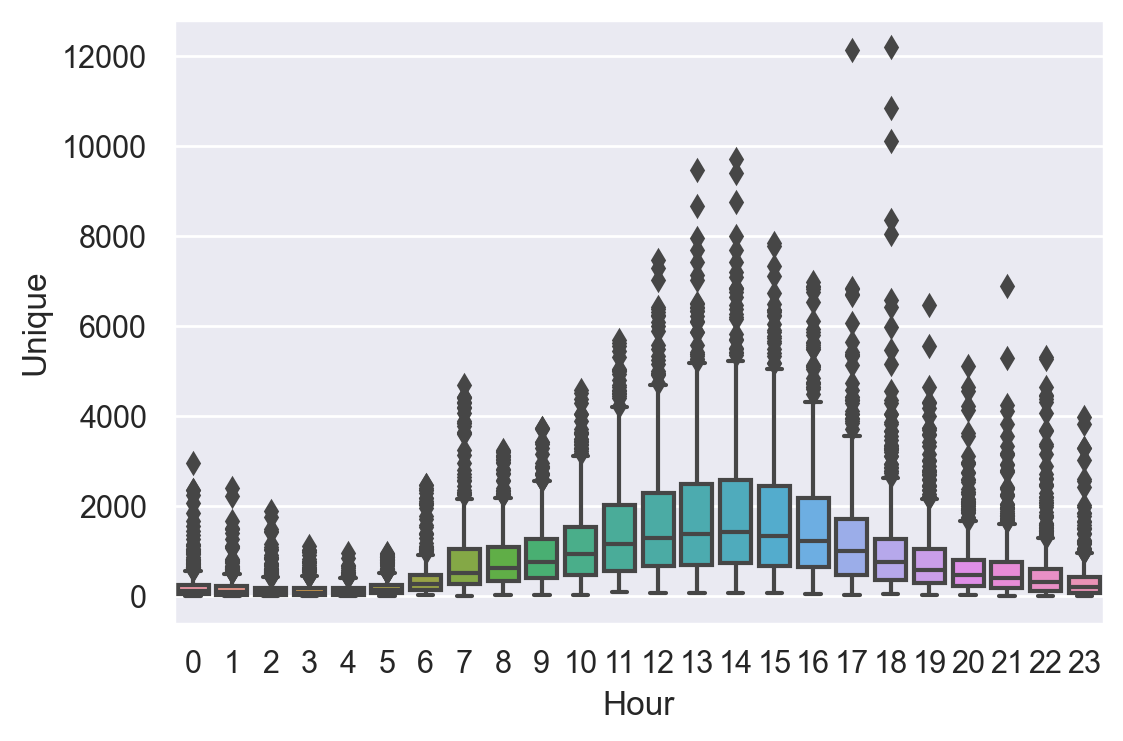

In [87]:
sns.boxplot(y = resono_hourly.Unique, x = resono_hourly.Hour)
plt.show()

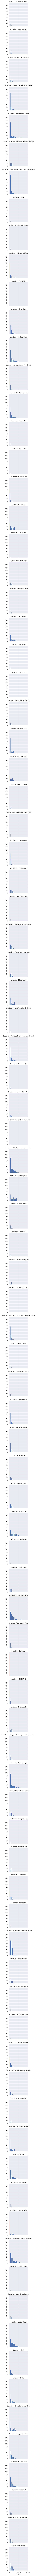

In [92]:
scale_plot_size(1)
g = sns.FacetGrid(resono_hourly, row = 'Location')
g = g.map(plt.hist, 'Visits')
plt.show()

### Penetration rate

In [49]:
p_resono_penetration = 'penetration_rate_140322_200322.csv'
resono_penetration = pd.read_csv(p_resono + p_resono_penetration)

In [51]:
resono_penetration.head()

,Location,Locationcode,Resono-ID,Postalcode4,Penetration-Rate
0,Leidsestraat,e13bd564e5d1,rcd036699P920,1017,42.31
1,Leidsestraat,e13bd564e5d1,rcd036699P920,1016,34.33
2,Leidsestraat,e13bd564e5d1,rcd036699P920,1012,24.44
3,Leidsestraat,e13bd564e5d1,rcd036699P920,1071,19.85
4,Leidsestraat,e13bd564e5d1,rcd036699P920,1015,19.05


### Cross visits

In [52]:
p_resono_cross = 'cross_visit_140322_200322.csv'
resono_cross = pd.read_csv(p_resono + p_resono_cross)

In [53]:
resono_cross.head(5)

,Location1,LocationCode1,Resono-ID1,Location2,LocationCode2,Resono-ID2,Percentage
0,AfasLive - Arenaboulevard,7b68e511bca9,rcd33036,AfasLive - Arenaboulevard,7b68e511bca9,rcd33036,100.0
1,AfasLive - Arenaboulevard,7b68e511bca9,rcd33036,Albert Cuyp,1552f5e1-ce00-4f54-adad-5a33c71cdc7b,rcd23828,3.8
2,AfasLive - Arenaboulevard,7b68e511bca9,rcd33036,Amstelpark,ba268bdf-f6f6-4caf-aa69-f64794f6479f,rcd23669,2.2
3,AfasLive - Arenaboulevard,7b68e511bca9,rcd33036,Amstelveld,439fee1b-bb1c-4e5f-a9ab-c170ab989dee,rcd23542,0.1
4,AfasLive - Arenaboulevard,7b68e511bca9,rcd33036,Amsterdamse Bos Noord,17fdcb22bd0b,rcd33001,2.7


### Geometry

In [197]:
p_resono_geo = 'resono_geometry.csv'
resono_geo = pd.read_csv(p_resono + p_resono_geo, sep=';')

In [59]:
resono_geo.head(5)

,location_uuid,location,type,include_druktebeeld,area_m2,geometry
0,312ae25b-bcd8-4d75-87aa-2c04ce5b35ef,Osdorpplein,pleinen,1,"73528,11033","POLYGON ((4.803506433963779 52.359768828522, 4..."
1,277397bb-43f0-44a7-a0ab-b4468020b32c,Zuidplein,pleinen,1,"24464,84833","POLYGON ((4.8726129 52.3406135990945, 4.872707..."
2,b6b71ef3-abba-4a5b-b500-ee06746fa7c2,Mercatorplein,pleinen,1,"14680,41173","POLYGON ((4.850507799999999 52.36994479909309,..."
3,95ffba77-1e9b-4e81-92bc-5dc86ef83887,Stadionplein,pleinen,1,"12306,1396","POLYGON ((4.8554548 52.3438582990943, 4.855631..."
4,4963d5a1-2f3d-43a3-8473-5d9921849426,Plein '40-'45,pleinen,1,"29799,86345","POLYGON ((4.8207421 52.3791394990927, 4.820807..."


## Some tryouts and experiments

In [30]:
#style for the graphic
sns.set_theme(style="darkgrid")

#sns.catplot(x="Location", y="Visits", kind="box", data=df)
#sns.catplot(x="Visits", y="Hour", hue="Location", kind="swarm", data=df)

In [32]:
data_slice = df.loc[:, ['Location','Date','Hour','Visits']]

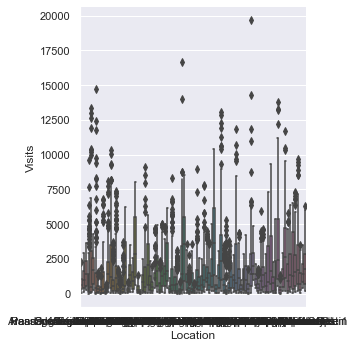

In [35]:
sns.catplot(x="Location", y="Visits", kind="box", data=data_slice)

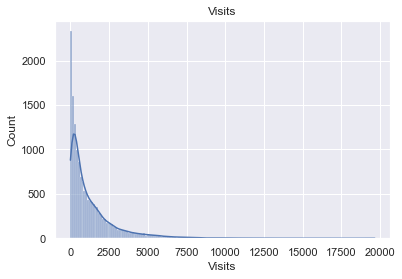

In [68]:
sns.histplot(resono_hourly.Visits, kde = True).set_title('Visits')
plt.show()